# ICS 434: DATA SCIENCE FUNDAMENTALS

## Non-Linear Regression

---

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

### Non-Linear Regression

* Complex models are rarely linear
  * This is not to say that linear models are not used 

* Linearity assumption is often "good enough", particularly for:
  * Quickly prototyping simple models that require full interpretability
  * Tackling questions that are not well defined to benefit from more complex models
  
* Always in search of better models but we need to always evaluate how much more leverage a more precise model is going to provide 
  

### Non-Linearity

* The model clearly looks non-linear

* We will generate data from the following model:

$$
y = 30 -0.3 x +0.005 x^2 + \epsilon
$$

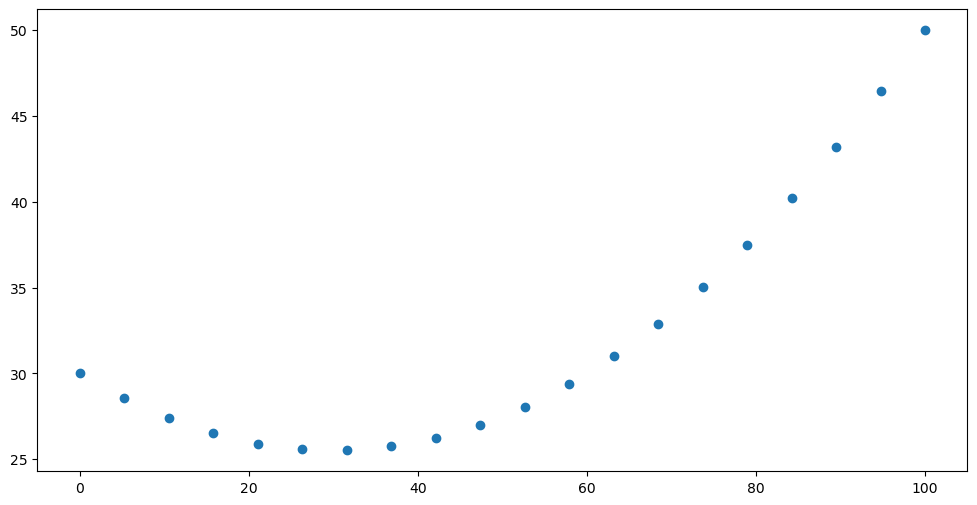

In [4]:
plt.figure(figsize=(12, 6))

x = np.linspace(0, 100, 20)
y = 30 + (-0.3 * x)+ (0.005 * x ** 2)

plt.scatter(x, y);

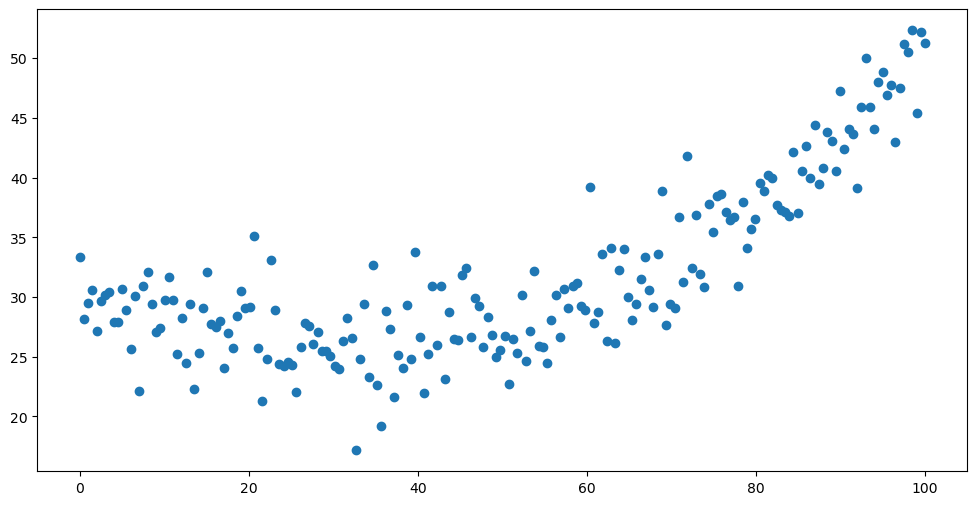

In [5]:
plt.figure(figsize=(12, 6))

errors = np.random.normal(0, 3, size=200)
x = np.linspace(0,100,200)
y = 30 + (-0.3 * x)+ (0.005 * x ** 2) + errors

plt.scatter(x, y);

### Non-Linearity -- Cont'd

* Residuals are not normally distributed
  * Recall that the assumption is that $\epsilon \sim \mathcal{N}(\mu,\sigma)$
  * This is a violation of the assumption

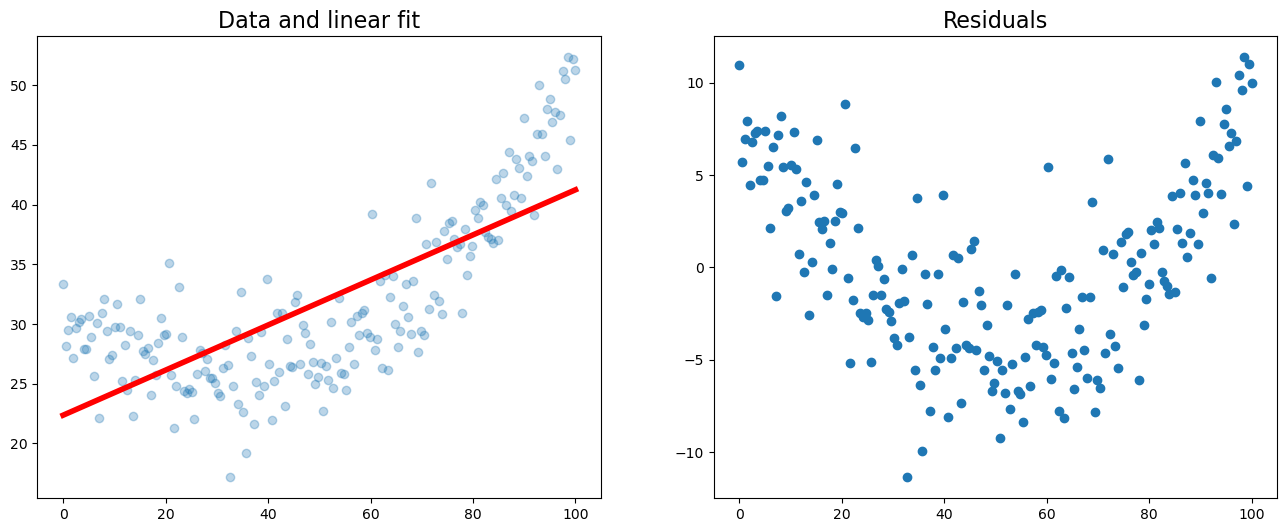

In [6]:
from scipy.stats import linregress

lm = linregress(x, y)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.scatter(x, y, alpha=0.3)
plt.plot(x, lm.intercept + lm.slope * x, color='r', linewidth=4)
plt.title("Data and linear fit", fontsize=16)

Res_vals = []
for (x_i, y_i) in zip(x, y):
    y_hat = lm.intercept + lm.slope * x_i 
    Res_vals.append(y_i - y_hat)

plt.subplot(1, 2, 2)
plt.scatter(x, Res_vals)
plt.title("Residuals", fontsize=16);

### How to Determine a Non-Linear Model

* How do we handle the case where data is clearly non-linear?

* Within a small region, the data will most likely be linear

* For instance, we look at the region $x \in [35, 45]$

In [7]:
small_range = x[(x >= 35) & (x <= 45)]
small_range

array([35.1758794 , 35.67839196, 36.18090452, 36.68341709, 37.18592965,
       37.68844221, 38.19095477, 38.69346734, 39.1959799 , 39.69849246,
       40.20100503, 40.70351759, 41.20603015, 41.70854271, 42.21105528,
       42.71356784, 43.2160804 , 43.71859296, 44.22110553, 44.72361809])

In [8]:
positions = np.where((x >= 35) & (x <= 45))
x[positions]

array([35.1758794 , 35.67839196, 36.18090452, 36.68341709, 37.18592965,
       37.68844221, 38.19095477, 38.69346734, 39.1959799 , 39.69849246,
       40.20100503, 40.70351759, 41.20603015, 41.70854271, 42.21105528,
       42.71356784, 43.2160804 , 43.71859296, 44.22110553, 44.72361809])

In [9]:
y[positions]

array([22.61400067, 19.16810745, 28.82744296, 27.29483993, 21.61805593,
       25.1461954 , 24.02772249, 29.32197369, 24.8349449 , 33.79903378,
       26.64179845, 21.93000079, 25.21860625, 30.89612029, 25.98757886,
       30.91700752, 23.15047611, 28.76836092, 26.51094626, 26.43322482])

(25.0, 55.0)

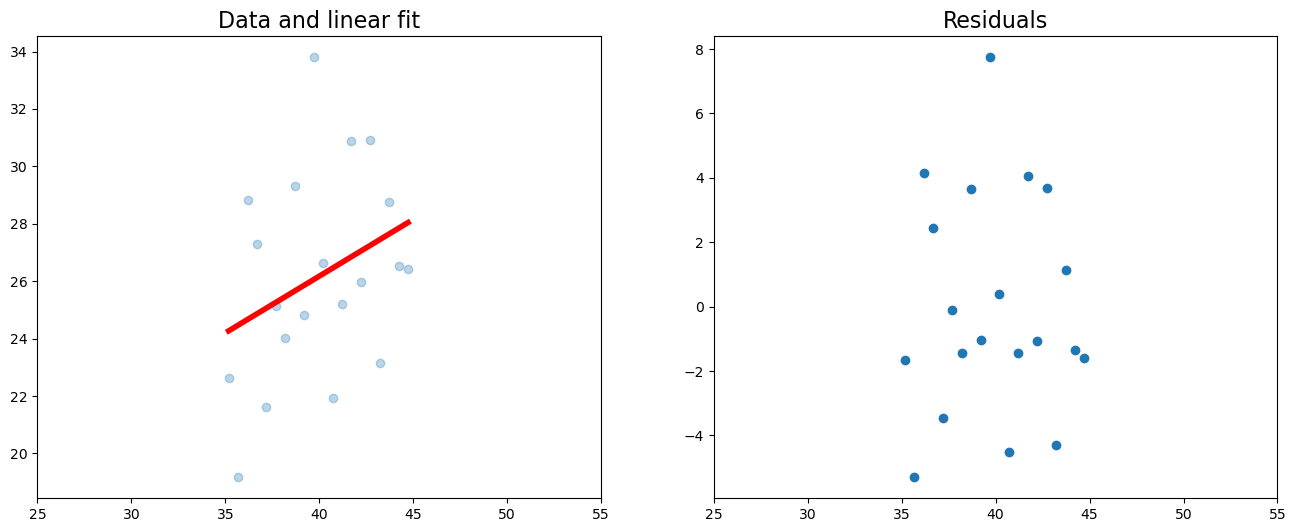

In [10]:
lm_2 = linregress(x[positions], y[positions])

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.scatter(x[positions], y[positions], alpha=0.3)
plt.plot(x[positions], lm_2.intercept + lm_2.slope * x[positions], color='r', linewidth=4)
plt.xlim(25, 55)
plt.title("Data and linear fit", fontsize=16)

Res_vals = []
for (x_i, y_i) in zip(x[positions], y[positions]):
    y_hat = lm_2.intercept + lm_2.slope * x_i 
    Res_vals.append(y_i - y_hat)

plt.subplot(1, 2, 2)
plt.scatter(x[positions], Res_vals)
plt.title("Residuals", fontsize=16);
plt.xlim(25, 55)


### How to Model Non-Linear Dataset

* A naive approach is perhaps to compute the model as the average of some points above and below that point 
*  For example, for $x=40$, we take 3 observed data points immediately before and after
  * Say, for instance, we take 5 points
 
* This is called a Nearest Neighbor regression

* Here, let's just take the mean as a prediction within a small region 



```
np.searchsorted(array, q)
```

* Find position of smallest value in `array` that is larger than `q`

In [11]:
x[130:150]

array([65.32663317, 65.82914573, 66.33165829, 66.83417085, 67.33668342,
       67.83919598, 68.34170854, 68.84422111, 69.34673367, 69.84924623,
       70.35175879, 70.85427136, 71.35678392, 71.85929648, 72.36180905,
       72.86432161, 73.36683417, 73.86934673, 74.3718593 , 74.87437186])

In [12]:
np.searchsorted(x, 70)

140

In [13]:
x[np.searchsorted(x, 70)]

70.35175879396985

In [14]:
pos = np.searchsorted(x, 70)
print(x[pos: pos+5])
print(x[pos-5: pos])

[70.35175879 70.85427136 71.35678392 71.85929648 72.36180905]
[67.83919598 68.34170854 68.84422111 69.34673367 69.84924623]


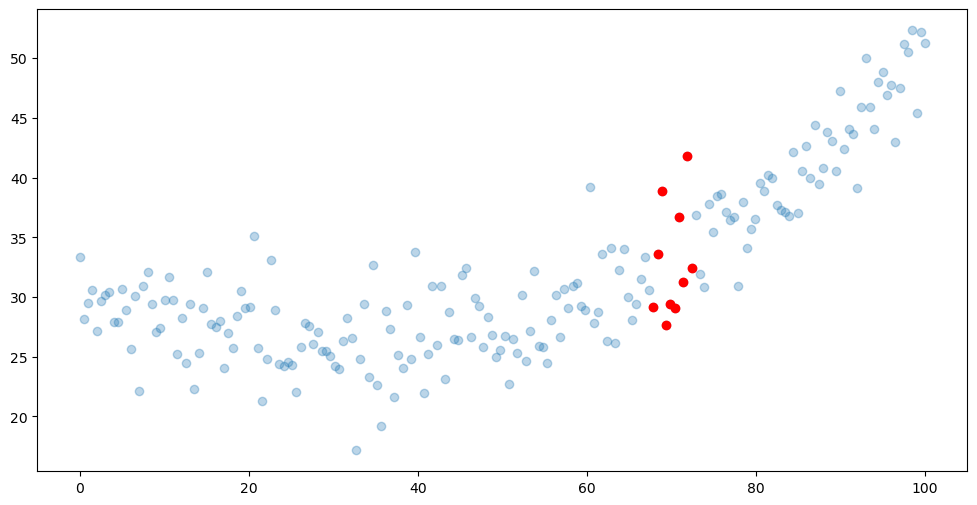

In [15]:
plt.figure(figsize=(12, 6))

neighbors = np.arange(pos-5, pos+5)
plt.scatter(x, y, alpha=0.3)
plt.scatter(x[neighbors], y[neighbors], color="red");

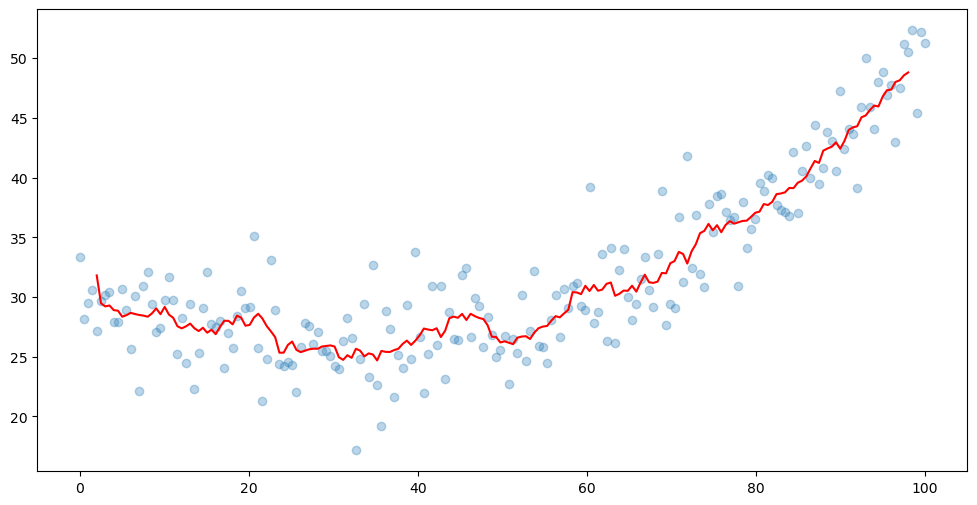

In [16]:
plt.figure(figsize=(12, 6))

reg_curve = []

for i in x[4:-4]:
    pos = np.searchsorted(x, i)
    neighbors = np.arange(pos-5, pos+5)
    reg_curve.append(y[neighbors].mean())

plt.scatter(x, y, alpha=0.3)
plt.plot(x[4:-4], reg_curve, color="red");

### Problems With This Approach

* What are the issues with this approach?


### Problems with Nearest Neighbor Regression

* Slow, imagine in the case with a large number of predictors

  * Does not scale well with a large number of parameters

* Highly affected by outliers

* We are missing values at the extremities
    * We cannot use for prediction

### Step Functions

* We can remedy these shortcomings by discretizing the $x$-axis

* Break the range of $x$ into bins, and fit a different constant in each bin

  * Such a group-specific constant can be `mean` as in nearest neighbors
  
* This amounts to converting a continuous variable into an ordered categorical variable

* This is called a step function


In [17]:
intervals = np.split(np.arange(len(x)), 10)
intervals

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39]),
 array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
        57, 58, 59]),
 array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
        77, 78, 79]),
 array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,
        97, 98, 99]),
 array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119]),
 array([120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
        133, 134, 135, 136, 137, 138, 139]),
 array([140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
        153, 154, 155, 156, 157, 158, 159]),
 array([160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
        173, 174, 175, 176, 177, 178, 179]),
 array([180, 181, 182, 183, 184, 185, 

In [18]:
intervals[4]

array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,
       97, 98, 99])

In [19]:
x[intervals[4]]

array([40.20100503, 40.70351759, 41.20603015, 41.70854271, 42.21105528,
       42.71356784, 43.2160804 , 43.71859296, 44.22110553, 44.72361809,
       45.22613065, 45.72864322, 46.23115578, 46.73366834, 47.2361809 ,
       47.73869347, 48.24120603, 48.74371859, 49.24623116, 49.74874372])

In [20]:
y[intervals[4]].mean()

27.397806741989513

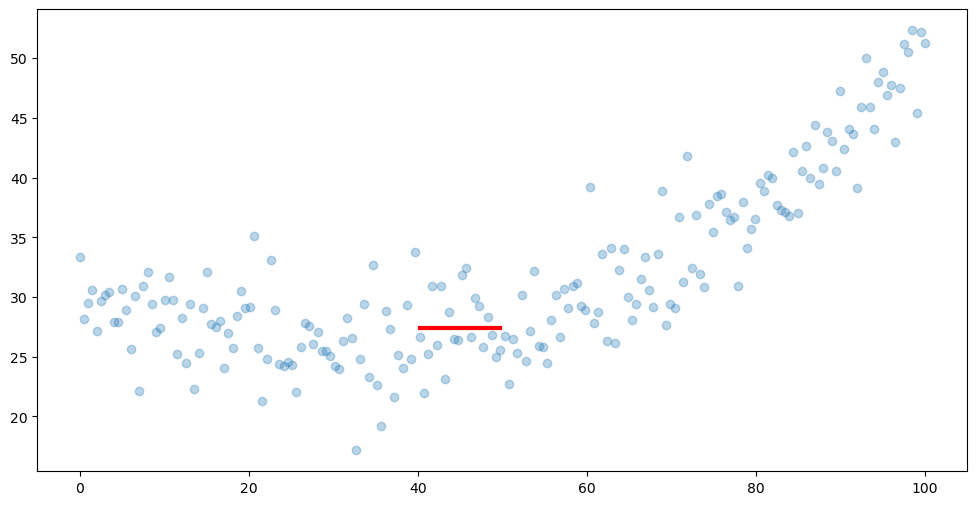

In [21]:
plt.figure(figsize=(12, 6))

plt.scatter(x, y, alpha=0.3)
plt.plot(x[intervals[4]], [y[intervals[4]].mean()] * len(intervals[4]), color="r", linewidth=3);

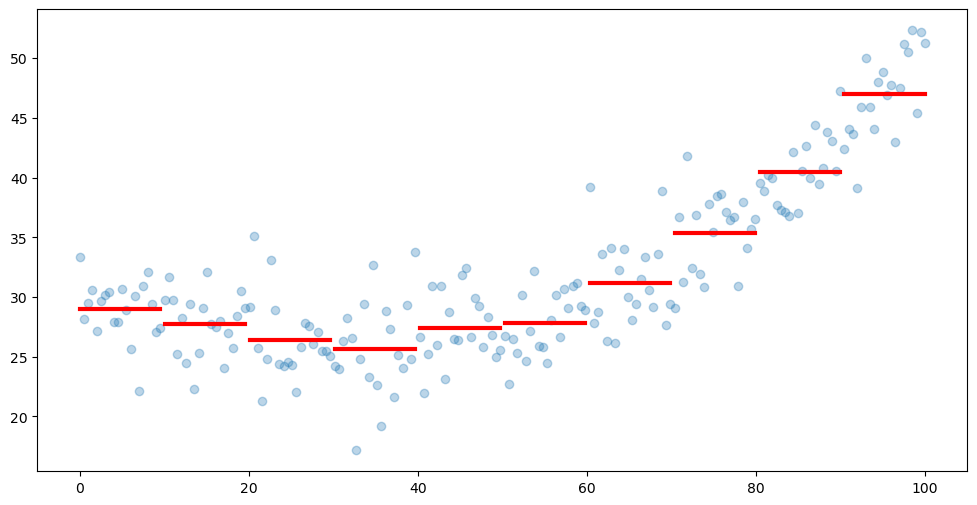

In [22]:
plt.figure(figsize=(12, 6))

plt.scatter(x, y, alpha=0.3)

means = []

for i in range(len(intervals)):
    means.append(y[intervals[i]].mean())
    plt.plot(x[intervals[i]], [y[intervals[i]].mean()] * len(intervals[i]), color="r", linewidth=3)

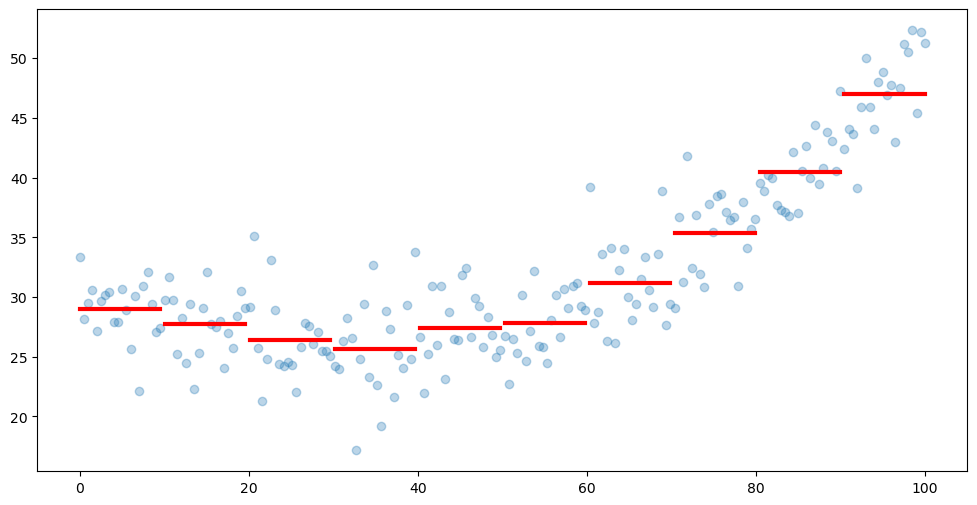

In [23]:
plt.figure(figsize=(12, 6))

plt.scatter(x, y, alpha=0.3)

for i in range(len(intervals)):
    plt.plot(x[intervals[i]], [y[intervals[i]].mean()] * len(intervals[i]), color="r", linewidth=3)

### Shortcomings of Step Functions

* How do you interpret sudden changes between two points close on the $x$-axis?

* Choice of cutpoints or "knots" can be problematic
  * The step function would have been different if we had split the function into 11, 9 or 13 intervals
* Arbitrary knots can lead to substantial variation issues
  * Different discrete intervals can lead to significantly different predictions   

### Polynomial Regression

* Rather than model the data with a first degree polynomial, we will use a higher degree polynomial 

  * Ex., second, third or even higher if needed

* A first degree polynomial

$$
    y = \beta_0 + \beta_1 x
$$

* A third degree polynomial 

$$ 
    y = \beta_0 + \beta_1 x + \beta_2x^2 + \beta_3x^3 
$$

### Using Linear Model in `sklearn`

* Two-step process:

    1. Transform $x$ into higher degree features
        
    2. Fit the model using the transformed polynomial features


### Inferring  Polynomial Features

* From the implementation point of view, this is just plain Ordinary Least Squares 

* Transform: 

$$ 
    y = \beta_0 + \beta_1 x + \beta_2x^2 + \beta_3x^3 
$$

$\hspace{0.6in}$ into:   

$$
    y = \beta_0 \cdot 1 + \beta_1 \cdot A + \beta_2 \cdot B + \beta_3 \cdot C
$$
<br>
$\hspace{0.6in}$ such that $A=x\mbox{, }B=x^2\mbox{ and }C=x^3$

* We can now consider $A$, $B$, and $C$ as new features of the model and use the same linear multivariate linear regression

    * The new representation of $y$ is still considered a linear model 
      * Coefficients associated with the features are still linear

### Using Linear Model in `sklearn` -- Cont'd


* Transform: 

$$ 
    y = \beta_0 + \beta_1 x + \beta_2x^2 + \beta_3x^3 
$$

$\hspace{0.6in}$ into:   

$$
    y = \beta_0 \cdot x^0 + \beta_1 \cdot A + \beta_2 \cdot B + \beta_3 \cdot C
$$
<br>
$\hspace{0.6in}$ where $A=x\mbox{, }B=x^2\mbox{ and }C=x^3$


* This can be easily done using `PolynomialFeatures` in `scikit-learn` library

    * Polynomial features are all polynomial combinations of the features with degree less than or equal to the specified degree. [(`scikit-learn` documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
    
    * Takes data as column vector

In [24]:
x = np.array([1, 2, 3, 4, 5])
x.reshape(-1, 1)

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [25]:
from sklearn.preprocessing import PolynomialFeatures

x = np.array([1, 2, 3, 4, 5])

poly = PolynomialFeatures(degree=3)
poly.fit_transform(x.reshape(-1, 1))

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.]])

### Using Linear Model in `sklearn` -- Cont'd

* For $v=[1, ~2, ~3, ~4, ~5]$ 

* In polynomial regression (third degree polynomial)

$$
v{'} = (v^0 = 1,~~A=v^1,~~B=v^2,~~C =v^3) 
$$

* Therefore,

$$
\begin{split}
V{'} = [& [ 1., &~~1., &~~~~1., &~~~~~1.], \\
        & [ 1., &~~2., &~~~~4., &~~~~~8.], \\
        & [ 1., &~~3., &~~~~9., &~~~27.], \\
        & [ 1., &~~4., &~~16., &~~~64.], \\
        & [ 1., &~~5., &~~25., &~125.]
       ]
\end{split}
$$



In [26]:
errors = np.random.normal(0, 3, size=200)
x = np.linspace(0, 100, 200)
y = 30 + (-0.3 * x)+ (0.005 * x ** 2) + errors

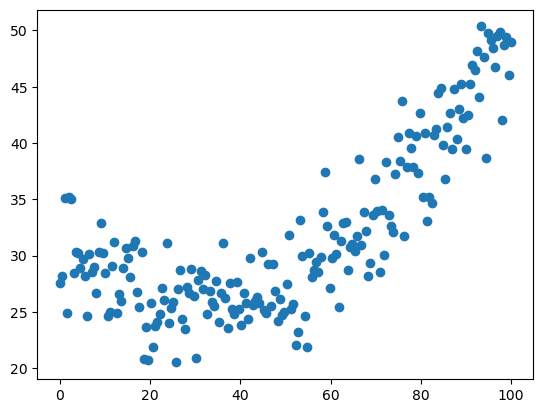

In [27]:
plt.scatter(x, y)

In [28]:
# we take a small subsample of x
np.random.seed(46)

subset_indices = np.random.choice(np.arange(len(x)), size=20)
subset_indices.sort()
subset_indices

array([ 22,  30,  31,  32,  40,  55,  59,  60,  69,  72,  79,  93,  98,
       116, 130, 146, 147, 155, 186, 189])

In [29]:
x[subset_indices]

array([11.05527638, 15.07537688, 15.57788945, 16.08040201, 20.10050251,
       27.63819095, 29.64824121, 30.15075377, 34.67336683, 36.18090452,
       39.69849246, 46.73366834, 49.24623116, 58.29145729, 65.32663317,
       73.36683417, 73.86934673, 77.88944724, 93.46733668, 94.97487437])

In [30]:
x[subset_indices][0:5]

array([11.05527638, 15.07537688, 15.57788945, 16.08040201, 20.10050251])

In [31]:
temp = x[subset_indices].reshape(-1, 1)
temp[0:5]

array([[11.05527638],
       [15.07537688],
       [15.57788945],
       [16.08040201],
       [20.10050251]])

In [32]:
poly = PolynomialFeatures(degree=2)
X_vals_transformed = poly.fit_transform(x[subset_indices].reshape(-1, 1))    
X_vals_transformed[0:5]

array([[  1.        ,  11.05527638, 122.21913588],
       [  1.        ,  15.07537688, 227.26698821],
       [  1.        ,  15.57788945, 242.67063963],
       [  1.        ,  16.08040201, 258.5793288 ],
       [  1.        ,  20.10050251, 404.03020126]])

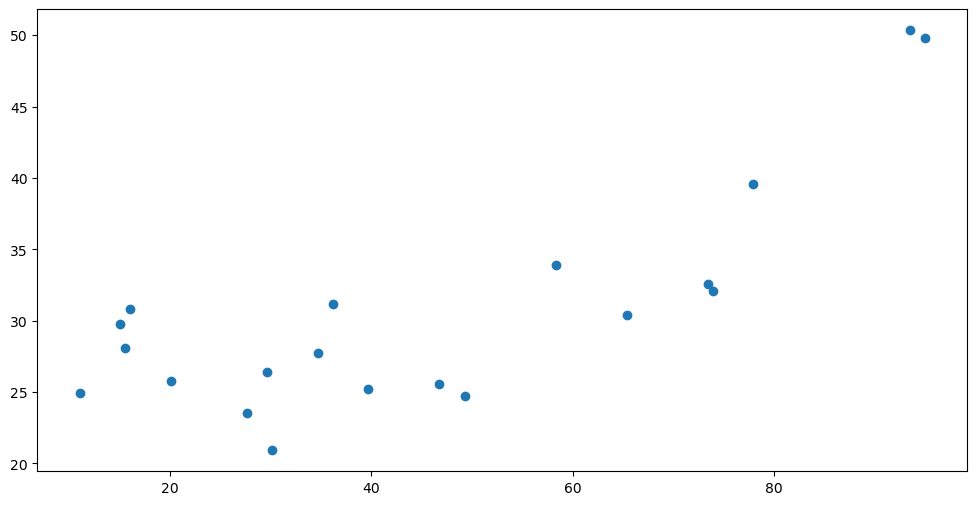

In [33]:
plt.figure(figsize=(12, 6))
plt.scatter(x[subset_indices], y[subset_indices])

from sklearn import linear_model

poly = PolynomialFeatures(degree=2)
X_vals_transformed = poly.fit_transform(x[subset_indices].reshape(-1, 1))    

lin = linear_model.LinearRegression()
lin.fit(X_vals_transformed, y[subset_indices].reshape(-1, 1));

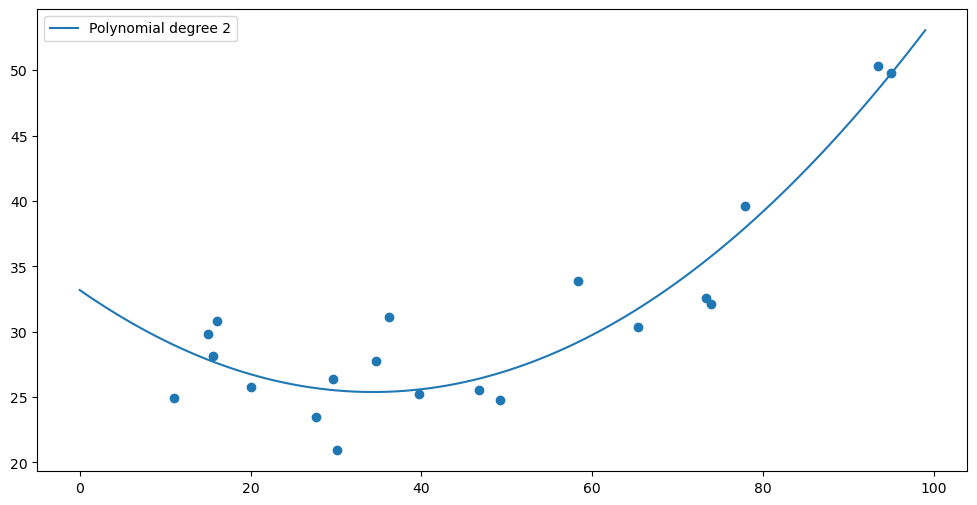

In [34]:
plt.figure(figsize=(12, 6))

x_axis= np.arange(0, max(x)).reshape(-1, 1)
X_axis_transformed = poly.transform(x_axis)
y_hat = lin.predict(X_axis_transformed)

plt.plot(x_axis, y_hat, label="Polynomial degree %s" % 2)
plt.scatter(x[subset_indices], y[subset_indices])
plt.legend();

### Increasing the Polynomial  Degree

* We said earlier that the best model is the one that minimizes the RSS

* In the above example, we see that we can improve the fit by choosing a higher-degree polynomial





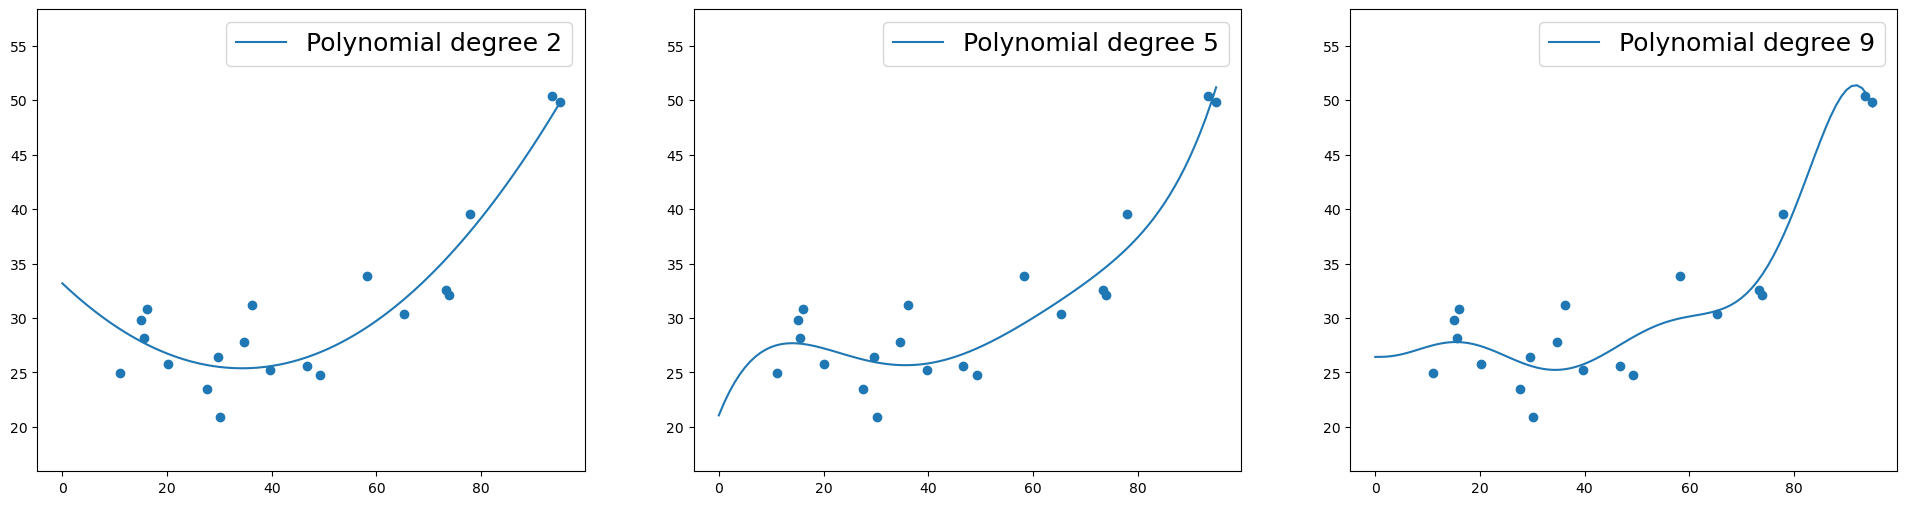

In [35]:
from sklearn import linear_model

plt.figure(figsize=(24, 6))

x_axis= np.arange(0, max(x)).reshape(-1, 1)

for i, polDegree in enumerate([2, 5, 9]):
    plt.subplot(1, 3, i+1)

    plt.scatter(x[subset_indices], y[subset_indices])
    poly = PolynomialFeatures(degree=polDegree)
    X_vals_transformed = poly.fit_transform(x[subset_indices].reshape(-1, 1))    
    X_axis_transformed = poly.transform(x_axis)

    lin = linear_model.LinearRegression()
    lin.fit(X_vals_transformed, y[subset_indices].reshape(-1, 1))
    y_hat = lin.predict(X_axis_transformed)

    plt.plot(x_axis[0:-4], y_hat[0:-4], label="Polynomial degree %s" % polDegree)
    plt.ylim(min(y[subset_indices]) - 5, max(y[subset_indices]) + 8)
    plt.legend(fontsize=18)

### Shortcomings of Higher Order Polynomials

* Better fits are often achieved by higher polynomials

* An $n^{th}$ degree polynomial will have $n-1$ "point of inflection" (Change of direction point)

* Overfits the data
    * Oscillations are very unlikely to be characteristic of the data
    * The model is capturing the noise in the data
    
* This is an example of over-fitting. 
  * Even though this model passes through most of the data, it will fail to generalize on unseen data
   
* We can use train validation splitting strategy to find the best polynomial degree
  * This strategy will work for most machine or statistical learning approaches
 

### Piecewise Polynomials

* Generalization of piecewise step functions and improvement over polynomials

* Instead of a single polynomial function, we use multiple polynomials, one in each region defined by knots

  * To avoid sharp edges between polynomial, like those generated by step functions, impose continuity
      * i.e., differentiable

* Using more knots leads to a more flexible piecewise polynomial

* We will illustrate it with a simple linear regression (i.e., degree = 1 ) 


In [36]:
# two knots (30 and 55)
# three regions (< 30, >=30 and <55, >= 55)

x_1_idx = np.where(x < 30)
x_2_idx = np.where((x >= 30) & (x < 55))
x_3_idx = np.where(x >= 55)

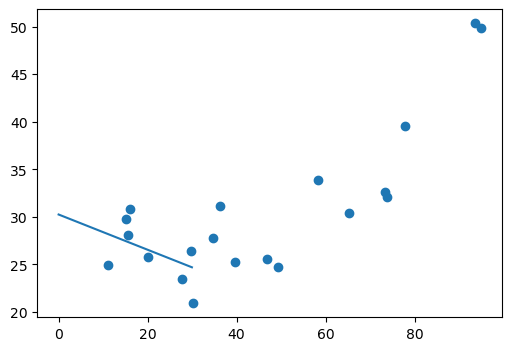

In [37]:
plt.figure(figsize=(6, 4))

plt.scatter(x[subset_indices], y[subset_indices])

x_1_axis = np.arange(0, 30, 0.05).reshape(-1, 1)

poly = PolynomialFeatures(degree=1)
X_vals_transformed = poly.fit_transform(x[x_1_idx].reshape(-1, 1))    
X_axis_transformed = poly.transform(x_1_axis)

lin = linear_model.LinearRegression()
lin.fit(X_vals_transformed, y[x_1_idx].reshape(-1, 1))
y_hat = lin.predict(X_axis_transformed)

plt.plot(x_1_axis, y_hat, label="Polynomial degree %s" % polDegree);

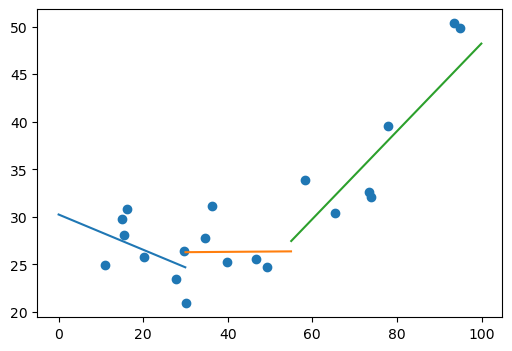

In [38]:
plt.figure(figsize=(6, 4))

plt.scatter(x[subset_indices], y[subset_indices])

x_1_axis = np.arange(0, 30, 0.05).reshape(-1, 1)

poly = PolynomialFeatures(degree=1)
X_vals_transformed = poly.fit_transform(x[x_1_idx].reshape(-1, 1))    
X_axis_transformed = poly.transform(x_1_axis)

lin = linear_model.LinearRegression()
lin.fit(X_vals_transformed, y[x_1_idx].reshape(-1, 1))
y_hat =  lin.predict(X_axis_transformed)
plt.plot(x_1_axis, y_hat, label= "Polynomial degree %s" % polDegree)


x_2_axis = np.arange(30, 55, 0.05).reshape(-1, 1)
poly = PolynomialFeatures(degree=1)
X_vals_transformed = poly.fit_transform(x[x_2_idx].reshape(-1, 1))    
X_axis_transformed = poly.transform(x_2_axis)

lin = linear_model.LinearRegression()
lin.fit(X_vals_transformed, y[x_2_idx].reshape(-1, 1))
y_hat =  lin.predict(X_axis_transformed)
plt.plot(x_2_axis, y_hat, label= "Polynomial degree %s" % polDegree)


x_3_axis = np.arange(55, 100, 0.05).reshape(-1, 1)
poly = PolynomialFeatures(degree=1)
X_vals_transformed = poly.fit_transform(x[x_3_idx].reshape(-1, 1))    
X_axis_transformed = poly.transform(x_3_axis)

lin = linear_model.LinearRegression()
lin.fit(X_vals_transformed, y[x_3_idx].reshape(-1, 1))
y_hat =  lin.predict(X_axis_transformed)
plt.plot(x_3_axis, y_hat, label= "Polynomial degree %s" % polDegree);

In [39]:
def lin_pred(X, Y, x_axis, deg=1):
    poly = PolynomialFeatures(degree=deg)
    vals_transformed = poly.fit_transform(X.reshape(-1, 1))    
    axis_transformed = poly.transform(x_axis)
    
    lin = linear_model.LinearRegression()
    lin.fit(vals_transformed, Y.reshape(-1, 1))
    y_pred = lin.predict(axis_transformed)
    
    return y_pred

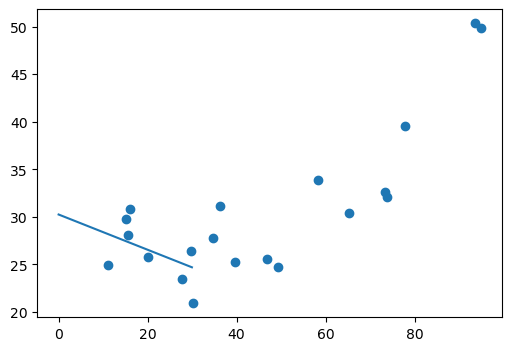

In [40]:
plt.figure(figsize=(6, 4))
plt.scatter(x[subset_indices], y[subset_indices])

x_1_axis = np.arange(0, 30, 0.05).reshape(-1, 1)
y_hat = lin_pred(x[x_1_idx], y[x_1_idx], x_1_axis, deg=1)

plt.plot(x_1_axis, y_hat);

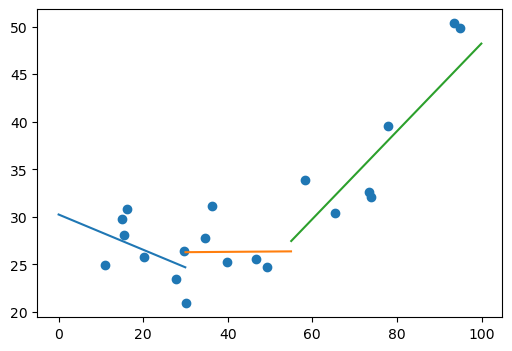

In [41]:
plt.figure(figsize=(6, 4))
plt.scatter(x[subset_indices], y[subset_indices])

x_1_axis = np.arange(0, 30, 0.05).reshape(-1, 1)
y_hat = lin_pred(x[x_1_idx], y[x_1_idx], x_1_axis, deg=1)
plt.plot(x_1_axis, y_hat)

x_2_axis = np.arange(30, 55, 0.05).reshape(-1, 1)
y_hat = lin_pred(x[x_2_idx], y[x_2_idx], x_2_axis, deg=1)
plt.plot(x_2_axis, y_hat)

x_3_axis = np.arange(55, 100, 0.05).reshape(-1, 1)
y_hat = lin_pred(x[x_3_idx], y[x_3_idx], x_3_axis, deg=1)
plt.plot(x_3_axis, y_hat);

### What Do We Want to Do? 

* We want to create a smooth function
  
  * Given a knot $x_i$, belonging to interval $j$, we want the model resulting from the combination of $f_{j-1}(x_i)$ and $f_j(x_i)$ is continuous at the knot
   
    * Continuous function is a function that does not have any abrupt changes in value 
    * Very small changes of $x$ should result in very small changes in $y$, i.e., $f_{j-1}(x_i) \approx f_j(x_i)$

* This is called the matching condition


### "Hacking"  the Matching Condition

* Split the data into 4 new intervals

* Instead of completely independent intervals, we force the intervals to overlap by 1 data point
  * The knots will be part of both models, therefore causing the models to satisfy $f_{j-1}(x_i) \approx f_j(x_i)$
  
* In the models, the solution is typically implemented by requiring that:
  * $f_{j-1}'$ and $f_j'$ exist at $x_i$; the curves are continuous at $x_i$
  * $f_{j-1}' \approx f_j'$; the curves are close at $x_i$
  

In [42]:
x_1_subset = x[subset_indices[0:8]]
x_2_subset = x[subset_indices[7:12]]
x_3_subset = x[subset_indices[11:14]]
x_4_subset = x[subset_indices[13:]]

y_1_subset = y[subset_indices[0:8]]
y_2_subset = y[subset_indices[7:12]]
y_3_subset = y[subset_indices[11:14]]
y_4_subset = y[subset_indices[13:]]

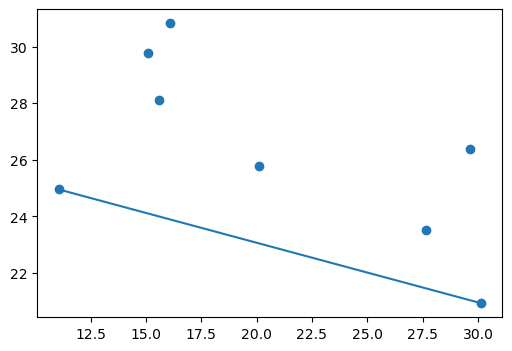

In [43]:
plt.figure(figsize=(6, 4))
plt.scatter(x_1_subset, y_1_subset)

x_1_axis = np.arange(min(x_1_subset), max(x_1_subset), 0.05).reshape(-1, 1)

poly = PolynomialFeatures(degree=1)
X_vals_transformed = poly.fit_transform(x_1_subset[[0, -1]].reshape(-1, 1))    
X_axis_transformed = poly.transform(x_1_axis)

lin = linear_model.LinearRegression()
lin.fit(X_vals_transformed, y_1_subset[[0, -1]].reshape(-1 ,1))
y_hat = lin.predict(X_axis_transformed)

plt.plot(x_1_axis, y_hat, label= "Polynomial degree %s" % polDegree);

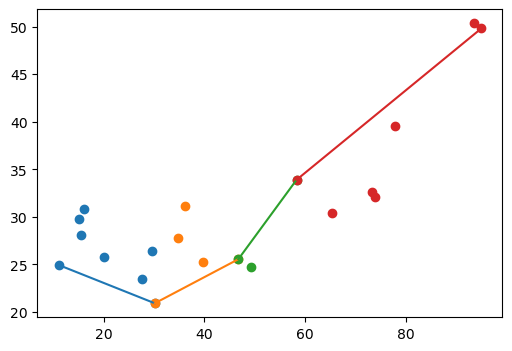

In [44]:
plt.figure(figsize=(6, 4))
plt.scatter(x_1_subset, y_1_subset)

x_1_axis = np.arange(min(x_1_subset), max(x_1_subset), 0.05).reshape(-1, 1)
poly = PolynomialFeatures(degree=1)
X_vals_transformed = poly.fit_transform(x_1_subset[[0, -1]].reshape(-1, 1))    
X_axis_transformed = poly.transform(x_1_axis)
lin = linear_model.LinearRegression()
lin.fit(X_vals_transformed, y_1_subset[[0, -1]].reshape(-1, 1))
y_hat =  lin.predict(X_axis_transformed)
plt.plot(x_1_axis, y_hat, label= "Polynomial degree %s" % polDegree)


plt.scatter(x_2_subset, y_2_subset)
x_2_axis = np.arange(min(x_2_subset), max(x_2_subset), 0.05).reshape(-1, 1)
poly = PolynomialFeatures(degree=1)
X_vals_transformed = poly.fit_transform(x_2_subset[[0, -1]].reshape(-1, 1))    
X_axis_transformed = poly.transform(x_2_axis)
lin = linear_model.LinearRegression()
lin.fit(X_vals_transformed, y_2_subset[[0, -1]].reshape(-1, 1))
y_hat =  lin.predict(X_axis_transformed)
plt.plot(x_2_axis, y_hat, label= "Polynomial degree %s" % polDegree)


plt.scatter(x_3_subset, y_3_subset)
x_3_axis = np.arange(min(x_3_subset), max(x_3_subset), 0.05).reshape(-1, 1)
poly = PolynomialFeatures(degree=1)
X_vals_transformed = poly.fit_transform(x_3_subset[[0, -1]].reshape(-1, 1))    
X_axis_transformed = poly.transform(x_3_axis)
lin = linear_model.LinearRegression()
lin.fit(X_vals_transformed, y_3_subset[[0, -1]].reshape(-1, 1))
y_hat =  lin.predict(X_axis_transformed)
plt.plot(x_3_axis, y_hat, label= "Polynomial degree %s" % polDegree)


plt.scatter(x_4_subset, y_4_subset)
x_4_axis = np.arange(min(x_4_subset), max(x_4_subset), 0.05).reshape(-1, 1)
poly = PolynomialFeatures(degree=1)
X_vals_transformed = poly.fit_transform(x_4_subset[[0, -1]].reshape(-1, 1))    
X_axis_transformed = poly.transform(x_4_axis)
lin = linear_model.LinearRegression()
lin.fit(X_vals_transformed, y_4_subset[[0, -1]].reshape(-1, 1))
y_hat =  lin.predict(X_axis_transformed)
plt.plot(x_4_axis, y_hat, label= "Polynomial degree %s" % polDegree);

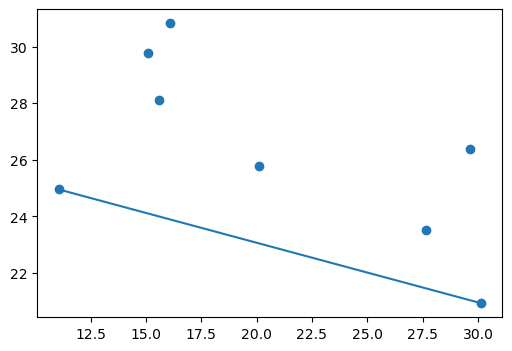

In [45]:
plt.figure(figsize=(6, 4))
plt.scatter(x_1_subset, y_1_subset)

x_1_axis = np.arange(min(x_1_subset), max(x_1_subset), 0.05).reshape(-1, 1)
y_hat = lin_pred(x_1_subset[[0, -1]], y_1_subset[[0, -1]], x_1_axis, deg=1)

plt.plot(x_1_axis, y_hat);

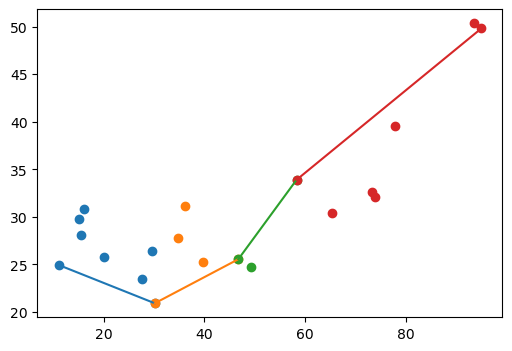

In [46]:
plt.figure(figsize=(6, 4))

plt.scatter(x_1_subset, y_1_subset)
x_1_axis = np.arange(min(x_1_subset), max(x_1_subset), 0.05).reshape(-1, 1)
y_hat = lin_pred(x_1_subset[[0, -1]], y_1_subset[[0, -1]], x_1_axis, deg=1)
plt.plot(x_1_axis, y_hat)

plt.scatter(x_2_subset, y_2_subset)
x_2_axis = np.arange(min(x_2_subset), max(x_2_subset), 0.05).reshape(-1, 1)
y_hat = lin_pred(x_2_subset[[0, -1]], y_2_subset[[0, -1]], x_2_axis, deg=1)
plt.plot(x_2_axis, y_hat)

plt.scatter(x_3_subset, y_3_subset)
x_3_axis = np.arange(min(x_3_subset), max(x_3_subset), 0.05).reshape(-1, 1)
y_hat = lin_pred(x_3_subset[[0, -1]], y_3_subset[[0, -1]], x_3_axis, deg=1)
plt.plot(x_3_axis, y_hat)

plt.scatter(x_4_subset, y_4_subset)
x_4_axis = np.arange(min(x_4_subset), max(x_4_subset), 0.05).reshape(-1, 1)
y_hat = lin_pred(x_4_subset[[0, -1]], y_4_subset[[0, -1]], x_4_axis, deg=1)
plt.plot(x_4_axis, y_hat);

### What Do We Want to Do? -- Cont'd

* In addition to the above, we want curves to be smooth at the knots

* The first derivative f'(x) represents the slope or rate of change of the function f(x). Setting f_1'(x_i) = f_2'(x_i) ensures that the two adjacent polynomial segments have the same slope at the knot x_i, which means that the tangent lines to the curves at that point are parallel, ensuring a smooth transition.

* We want the second derivative to:
  * $f_{j-1}'' \approx f_j''$; the curves are smooth at $x_i$

* The second derivative f''(x) represents the rate of change of the slope or curvature of the function f(x).
  * If the second derivatives of the two adjacent polynomial segments are not equal at the knot $x_i$, it means that the curvature changes abruptly at that point, resulting in a kink or sharp corner in the overall curve.


* In mathematics, B-spline or basis spline is a spline function that has minimal support with respect to a given degree, smoothness, and domain partition. Any spline function of given degree can be expressed as a linear combination of B-splines of that degree.


In [47]:
# we take a small subsample of x, 
# results are more dramatic

from patsy import dmatrix
import statsmodels.api as sm

# Specifying 3 knots for the b-splines model
transformed_x = dmatrix("bs(x, knots=(25, 40, 60), degree=1)",
                        {"x": x[subset_indices]}, return_type='dataframe')

model_d1 = sm.GLM(y[subset_indices], transformed_x).fit()
pred = model_d1.predict(dmatrix("bs(x_axis, knots=(25, 40, 60), degree=1)",
                                {"x_axis": x_axis}, return_type='dataframe'))
model_d1.params

Intercept                                 28.888909
bs(x, knots=(25, 40, 60), degree=1)[0]    -4.161150
bs(x, knots=(25, 40, 60), degree=1)[1]    -2.084837
bs(x, knots=(25, 40, 60), degree=1)[2]    -1.370678
bs(x, knots=(25, 40, 60), degree=1)[3]    20.394927
dtype: float64

In [48]:
# we take a small subsample of x, 
# results are more dramatic

from patsy import dmatrix
import statsmodels.api as sm

# Specifying 3 knots for the b-splines model
transformed_x = dmatrix("bs(x, knots=(25, 40, 60), degree=1)",
                        {"x": x[subset_indices]}, return_type='dataframe')

model_d1 = sm.OLS(y[subset_indices], transformed_x).fit()
pred = model_d1.predict(dmatrix("bs(x_axis, knots=(25, 40, 60), degree=1)",
                                {"x_axis": x_axis}, return_type='dataframe'))
model_d1.params

Intercept                                 28.888909
bs(x, knots=(25, 40, 60), degree=1)[0]    -4.161150
bs(x, knots=(25, 40, 60), degree=1)[1]    -2.084837
bs(x, knots=(25, 40, 60), degree=1)[2]    -1.370678
bs(x, knots=(25, 40, 60), degree=1)[3]    20.394927
dtype: float64

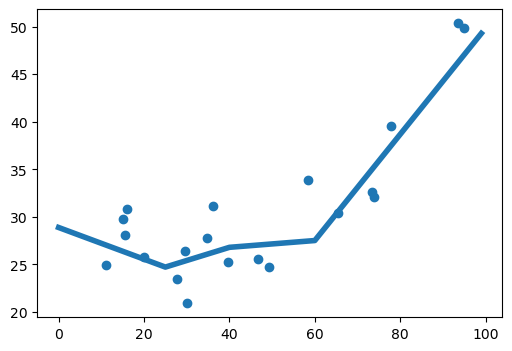

In [49]:
plt.figure(figsize=(6, 4))
plt.scatter(x[subset_indices], y[subset_indices])
plt.plot(x_axis, pred, linewidth=4);

### Cubic Splines

* Using line does not provide for "local" flexibility at the knots

* A line has only two degrees of freedom, $(a,b)$ in $y =a + bx$
  * Forcing the line to go through two points, we have used both degrees of freedom
  
* A quadratic has three degrees of freedom $(a,b,c)$ in $y =a + b x +c x^2$
  * Forcing a quadratic function to go through two points and fixing the derivative at one of the knots, we have used all three degrees of freedom
    * No way to fix the derivative at the second knot
    
* A cubic spline has four degrees of freedom $(a,b,c,d)$ in $y =a + b x +c x^2 + d x^3$

* A cubic spline with knots at $\xi_k$, $k = 1, \dots, K$ is a piecewise cubic polynomial with continuous derivatives up to order of 2 at each knot


### Cubic Splines

* A cubic spline with knots at $\xi_k$, $k = 1, \dots, K$ is a piecewise cubic polynomial with continuous derivatives up to order 2 at each knot


In [50]:
# from patsy import dmatrix
# import statsmodels.api as sm

# x_axis = np.arange(min(x[subset_indices]), max(x[subset_indices]), 0.05).reshape(-1, 1)

# # use df option to produce a spline with knots at uniform quantiles of the data
# transformed_x = dmatrix("bs(x, degree=3, df=4)",
#                         {"x": x[subset_indices]}, return_type='dataframe')

# model_d3 = sm.GLM(y[subset_indices], transformed_x).fit()
# pred = model_d3.predict(dmatrix("bs(x_axis, degree=3, df=4)",
#                                 {"x_axis": x_axis}, return_type='dataframe'))
# model_d3.params

In [51]:
import numpy as np
from scipy.interpolate import CubicSpline

# Create a cubic spline object
cs = CubicSpline(x, y)

# Evaluate the spline at new x values
x_new = np.arange(min(x), max(x), 0.05)
y_new = cs(x_new)

coeffs = cs.c  


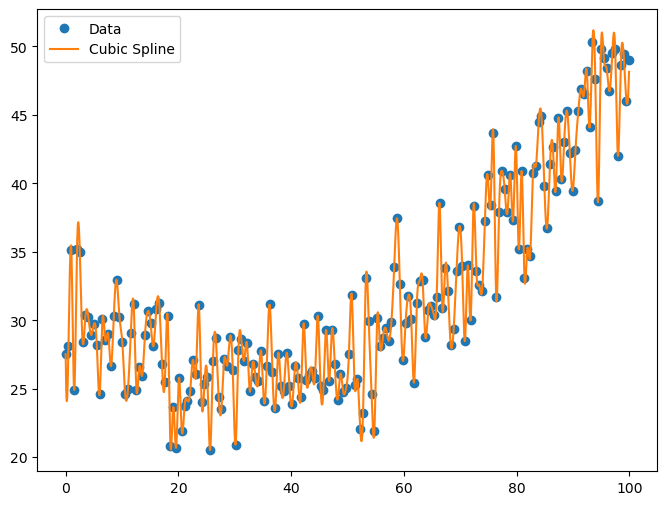

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Data')
plt.plot(x_new, y_new, label='Cubic Spline')
plt.legend()
plt.show()

In [53]:
from patsy import dmatrix
import statsmodels.api as sm

x_axis = np.arange(min(x[subset_indices]), max(x[subset_indices]), 0.05).reshape(-1, 1)

# use df option to produce a spline with knots at uniform quantiles of the data
transformed_x = dmatrix("bs(x, degree=3, df=4)",
                        {"x": x[subset_indices]}, return_type='dataframe')

model_d3 = sm.OLS(y[subset_indices], transformed_x).fit()
pred = model_d3.predict(dmatrix("bs(x_axis, degree=3, df=4)",
                                {"x_axis": x_axis}, return_type='dataframe'))
model_d3.params

Intercept                   28.198258
bs(x, degree=3, df=4)[0]    -1.881354
bs(x, degree=3, df=4)[1]    -3.591851
bs(x, degree=3, df=4)[2]     3.241799
bs(x, degree=3, df=4)[3]    22.521043
dtype: float64

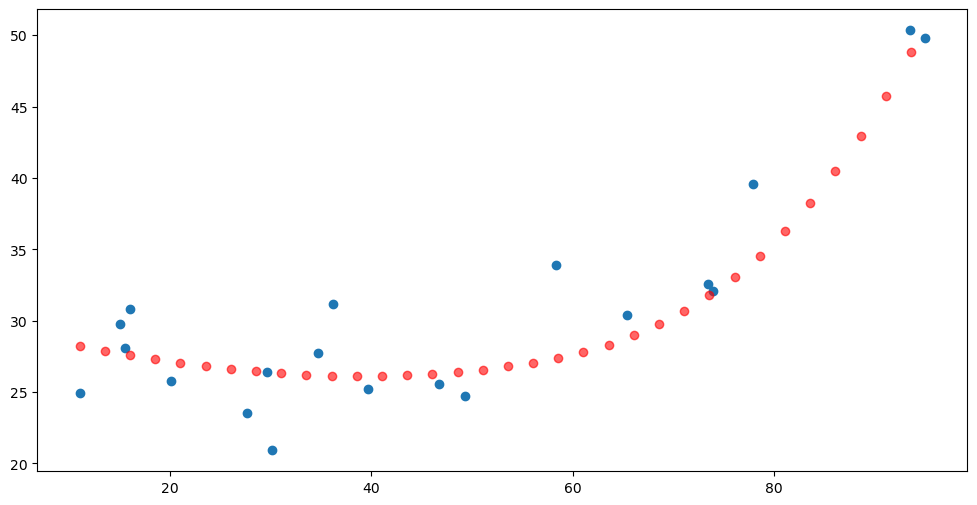

In [54]:
plt.figure(figsize=(12, 6))
plt.scatter(x[subset_indices], y[subset_indices])
plt.scatter(x_axis[::50], pred[::50], color='red', alpha=0.6);

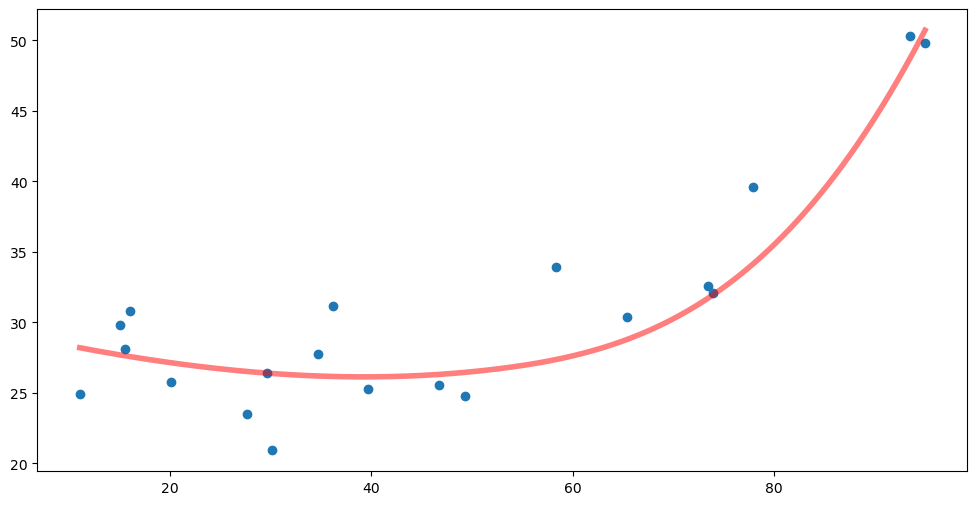

In [55]:
plt.figure(figsize=(12, 6))
plt.scatter(x[subset_indices], y[subset_indices])
plt.plot(x_axis, pred, linewidth=4, color='r', alpha=0.5);

In [56]:
transformed_x = dmatrix("bs(x, knots=(25, 40, 60), degree=3)",
                        {"x": x[subset_indices]}, return_type='dataframe')

model_d3 = sm.OLS(y[subset_indices], transformed_x).fit()
pred = model_d3.predict(dmatrix("bs(x_axis, knots=(25, 40, 60), degree=3)",
                                {"x_axis": x_axis}, return_type='dataframe'))
model_d3.params

Intercept                                 25.552942
bs(x, knots=(25, 40, 60), degree=3)[0]     6.642802
bs(x, knots=(25, 40, 60), degree=3)[1]    -4.078493
bs(x, knots=(25, 40, 60), degree=3)[2]     3.124444
bs(x, knots=(25, 40, 60), degree=3)[3]     1.721036
bs(x, knots=(25, 40, 60), degree=3)[4]    13.764657
bs(x, knots=(25, 40, 60), degree=3)[5]    25.252209
dtype: float64

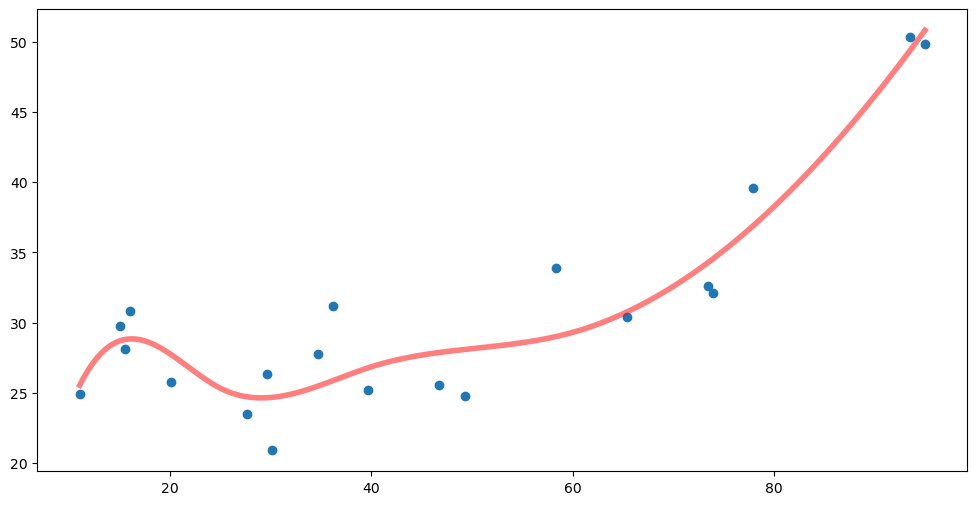

In [57]:
plt.figure(figsize=(12, 6))
plt.scatter(x[subset_indices], y[subset_indices])
plt.plot(x_axis, pred, linewidth=4, color='r', alpha=0.5);

### How Many Knots to Use? 


* Simple (naive) approach is to try out different numbers of knots and see which produces the best fitting curve
  * Using validation set ot decide
* A more objective approach is to use a training/validation split strategy


### Where Do You Choose the Knots?

* In practice, it's common to place knots uniformly
  * For example, at equally distant quantiles of the data
    * Ex. put 3 knots at the 25th, 50th and 75th quantiles of the data
  
* Ideally, you want to put more knots in regions where the data vary most rapidly


### Splines vs. Polynomial Regression

* Spline regression typically gives superior results to polynomial regression
  * High-degree polynomials produce strange curves at the boundaries

  * Regression splines do not need to use high degree polynomials to fit the data
    * We can fit a very complex dataset using a cubic spline
    * Add more knots to regions where data is complex
      * add flexibility in places where it is needed without having to add more predictors

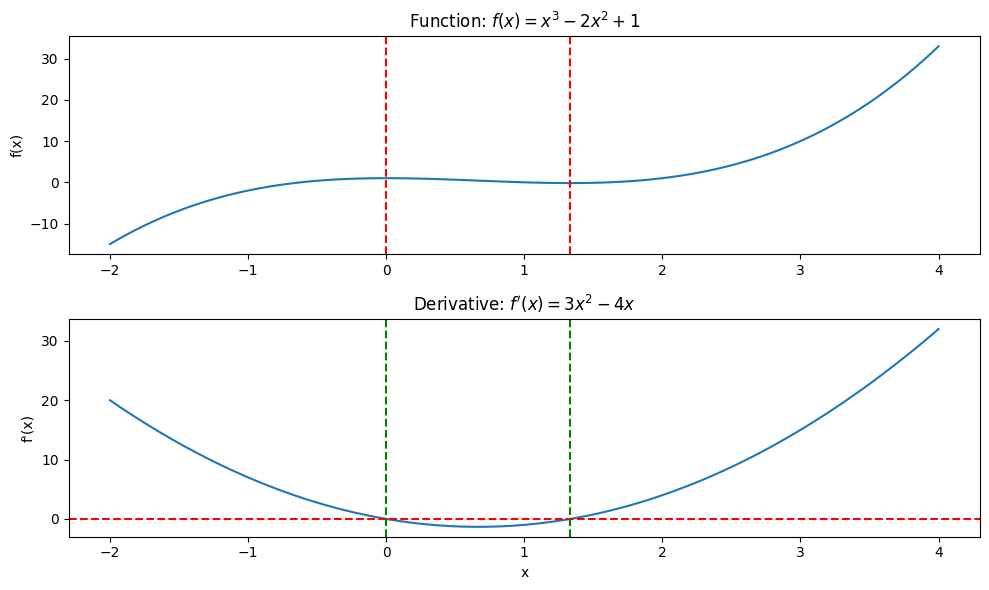

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - 2*x**2 + 1

def f_prime(x):
    return 3*x**2 - 4*x

x = np.linspace(-2, 4, 100)
y = f(x)
y_prime = f_prime(x)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(x, y)
plt.axvline(0, color='r', linestyle='--')
plt.axvline(4/3, color='r', linestyle='--')
plt.title('Function: $f(x) = x^3 - 2x^2 + 1$')
plt.ylabel('f(x)')

plt.subplot(2, 1, 2)
plt.plot(x, y_prime)
plt.axhline(0, color='r', linestyle='--')
plt.axvline(0, color='g', linestyle='--')
plt.axvline(4/3, color='g', linestyle='--')
plt.title('Derivative: $f\'(x) = 3x^2 - 4x$')
plt.ylabel('f\'(x)')
plt.xlabel('x')

plt.tight_layout()
plt.show()

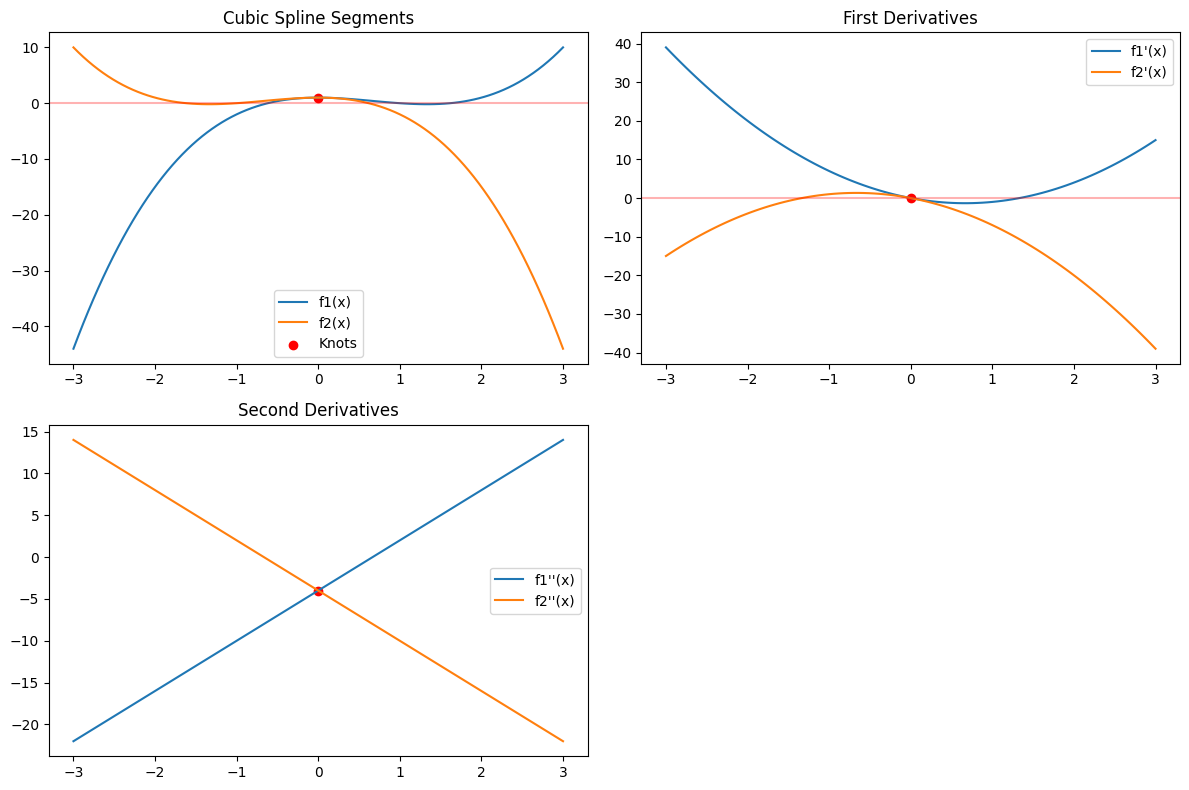

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Define knot points
knots = np.array([0])

# Define cubic spline segments
def f1(x):
    return x**3 - 2*x**2 + 1

def f2(x):
    return -x**3 - 2*x**2 + 1

# Calculate first and second derivatives
f1_prime = lambda x: 3*x**2 - 4*x
f2_prime = lambda x: -3*x**2 -4*x

f1_double_prime = lambda x: 6*x - 4
f2_double_prime = lambda x: -6*x - 4

# Plot the spline segments and their derivatives
x = np.linspace(-3, 3, 100)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(x, f1(x), label='f1(x)')
plt.plot(x, f2(x), label='f2(x)')
plt.axhline(0, color='red', alpha=0.3)
plt.scatter(knots, f1(knots), color='r', marker='o', label='Knots')
plt.title('Cubic Spline Segments')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x, f1_prime(x), label="f1'(x)")
plt.plot(x, f2_prime(x), label="f2'(x)")
plt.axhline(0, color='red', alpha=0.3)
plt.scatter(knots, f1_prime(knots), color='r', marker='o')
plt.title('First Derivatives')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x, f1_double_prime(x), label="f1''(x)")
plt.plot(x, f2_double_prime(x), label="f2''(x)")
plt.scatter(knots, f1_double_prime(knots), color='r', marker='o')
plt.title('Second Derivatives')
plt.legend()

plt.tight_layout()
plt.show()

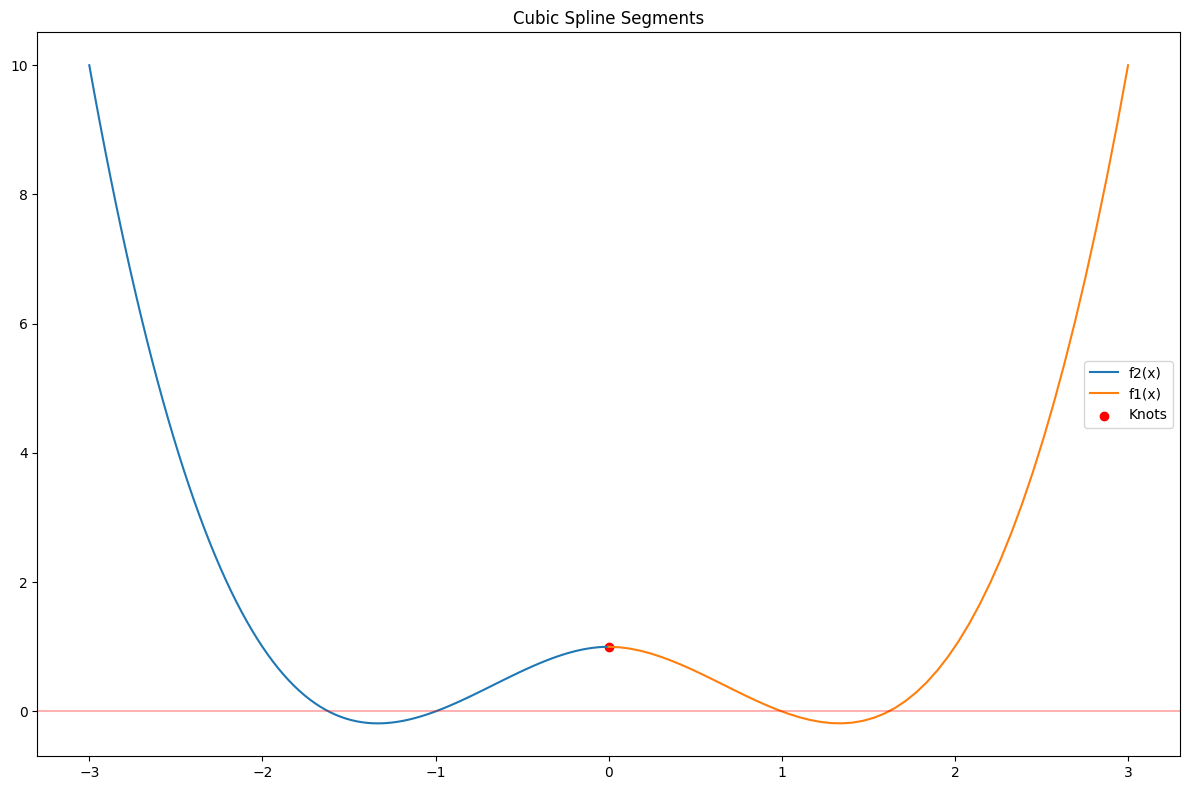

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Define knot points
knots = np.array([0])

# Define cubic spline segments
def f1(x):
    return x**3 - 2*x**2 + 1

def f2(x):
    return -x**3 - 2*x**2 + 1

# Calculate first and second derivatives
f1_prime = lambda x: 3*x**2 - 4 * x
f2_prime = lambda x: -3*x**2 -4 * x

f1_double_prime = lambda x: 6*x - 4
f2_double_prime = lambda x: -6*x  -4

# Plot the spline segments and their derivatives
x_1 = np.linspace(-3, 0, 100)
x_2 = np.linspace(0, 3, 50)

plt.figure(figsize=(12, 8))

plt.plot(x_1, f2(x_1), label='f2(x)')

plt.plot(x_2, f1(x_2), label='f1(x)')
plt.axhline(0, color='red', alpha=0.3)
plt.scatter(knots, f1(knots), color='r', marker='o', label='Knots')
plt.title('Cubic Spline Segments')
plt.legend()

plt.tight_layout()
plt.show()